In [11]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv("Walmart_Sales.csv")  

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


20:56:05 - cmdstanpy - INFO - Chain [1] start processing
20:56:05 - cmdstanpy - INFO - Chain [1] done processing


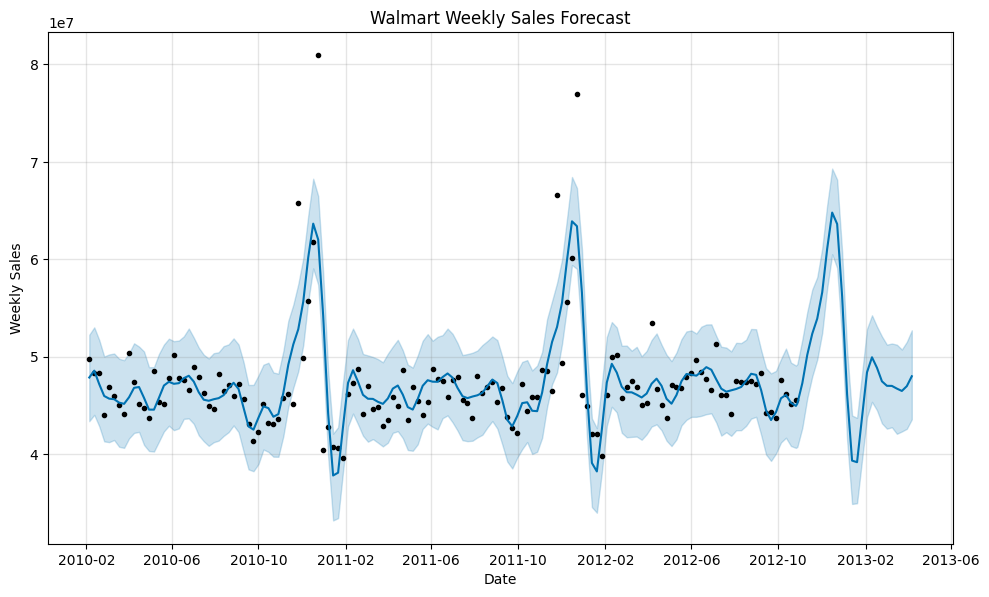

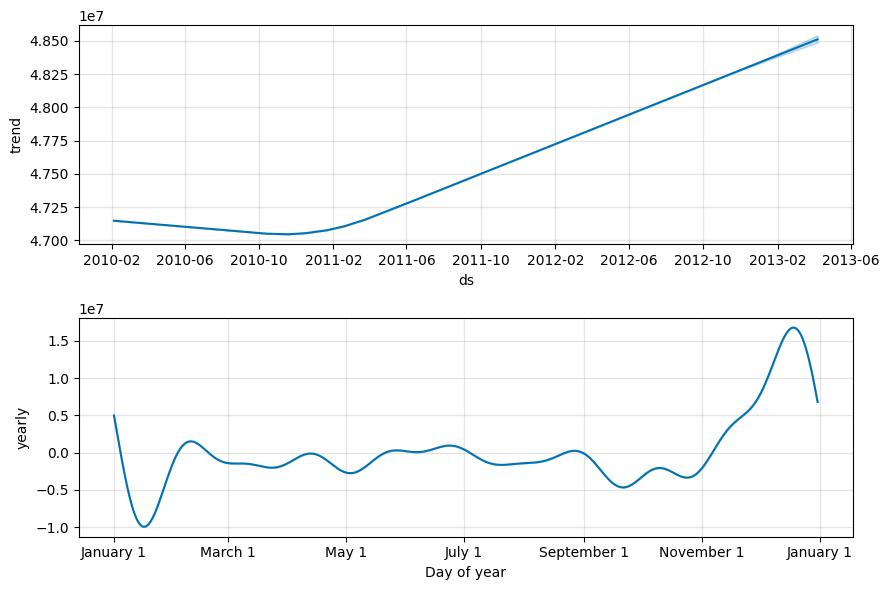

In [12]:
# Convert 'Date' column to datetime DD-MM-YYYY format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Aggregate sales by date (we have multiple stores per date)
df_grouped = df.groupby('Date').agg({'Weekly_Sales': 'sum'}).reset_index()

# Rename columns for Prophet
df_prophet = df_grouped.rename(columns={
    'Date': 'ds',
    'Weekly_Sales': 'y'
})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Create a future dataframe (forecast 24 weeks ahead)
future = model.make_future_dataframe(periods=24, freq='W')  # 24 future weeks
forecast = model.predict(future)

# STEP 7: Plot the forecast
fig1 = model.plot(forecast)
plt.title("Walmart Weekly Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
fig1.savefig("output/forecast.jpg", format='jpg', dpi=300)
plt.show()

# Optional: Plot forecast components (trend, seasonality)
fig2 = model.plot_components(forecast)
fig2.savefig("output/trend_seasonality.jpg", format='jpg', dpi=300)
plt.show()
